# Using Recipe Ingredients to Categorize Cuisine

By Eka Renardi. October 7, 2015

## Introduction

This document outline my solution for solving this Kaggle Competition. Kaggle posed a challenge for predicting the category of cuisine based on its recipe ingredients. 

### Dataset

*Yummly* graciously provided the dataset for this challenge. The dataset consists of train and test set. The train set listed the cuisines, and ingredients for the cuisine.  The test set data listed just the ingredients. A sample train data set is as follows:

```
{
    "id": 25693,
    "cuisine": "southern_us",
    "ingredients": [
      "plain flour",
      "ground pepper",
      "salt",
      "tomatoes",
      "ground black pepper",
      "thyme",
      "eggs",
      "green tomatoes",
      "yellow corn meal",
      "milk",
      "vegetable oil"
    ]
}
```

Attributes:

- "id" - unique identifier
- "cuisine" - category of a cuisine
- "ingredients" - ingredients used to make the cuisine


## Exploratory Statistics

In my attempt to understand the data, several exploratory statistics are constructed. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    
from collections import Counter, defaultdict
import seaborn as sns
from nltk.stem.porter import *

sns.set_style('whitegrid')

df = pd.read_json("../data/train.json")

#### How many unique cuisines are there, and what are they?

('shape:', (39774, 3))
('unique cuisine count:', 20)


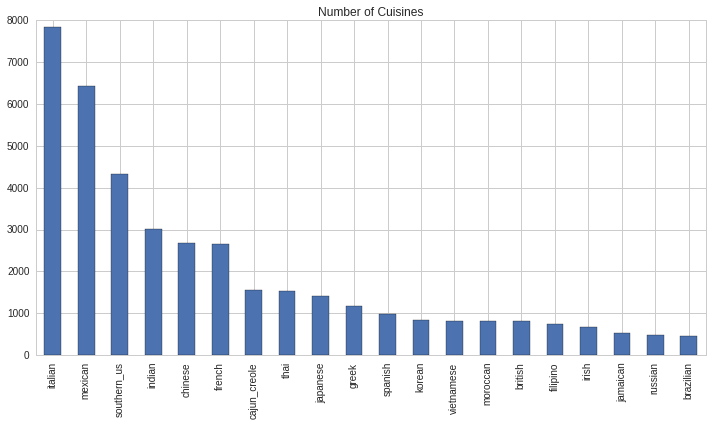

In [2]:
cuisines = df.cuisine.value_counts(sort=True)
cuisines.plot(kind="bar", figsize=(12,6), title="Number of Cuisines")
print("shape:", df.shape)
print("unique cuisine count:", len(df.cuisine.unique()))

#### What is the most often used ingredients by all cuisine? and what is the most often used ingredients for each cuisine?

In [3]:
# calculating the usage of each ingredient, and for each cuisine
cuisine_dict = defaultdict(Counter)
total_counter = Counter()
stemmer = PorterStemmer()
for index, row in df.iterrows():
    # get the local_counter
    local_counter = cuisine_dict[row.cuisine]
    # count the ingredients usage
    arr = row.ingredients
    for ingredient in row.ingredients:
        # stemm the ingredient string, e.g. 'eggs' is the same as 'egg'
        lemm_ingredient = ' '.join([stemmer.stem(word) for word in ingredient.split(' ')])
        total_counter[lemm_ingredient] += 1
        local_counter[lemm_ingredient] += 1
    # update the local_counter
    cuisine_dict[row.cuisine] = local_counter

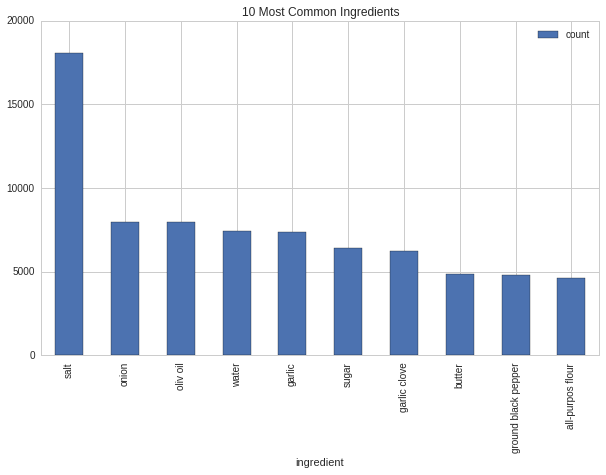

In [4]:
# plotting it
data1 = pd.DataFrame(total_counter.most_common(10), columns=["ingredient", "count"])
data1.plot(kind="bar", x="ingredient", figsize=(10,6), title="10 Most Common Ingredients")   

Let's draw a word cloud for top 100 ingredients.

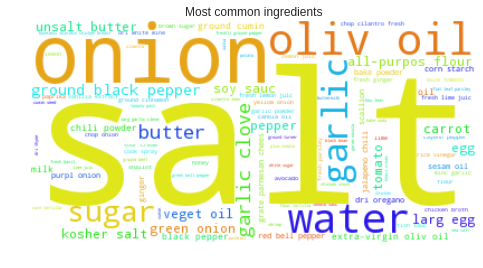

In [6]:
from wordcloud import WordCloud
wordcloudobj = WordCloud( background_color='white')
wordcloud = wordcloudobj.generate_from_frequencies(total_counter.most_common(100))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common ingredients")
plt.show()

Now let's look at the 100 most common ingredients used for each cuisine

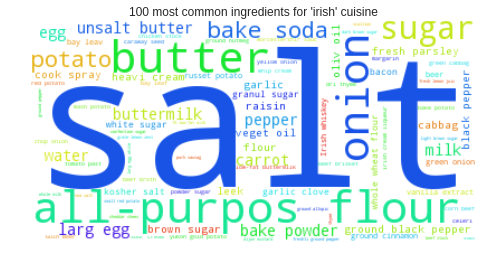

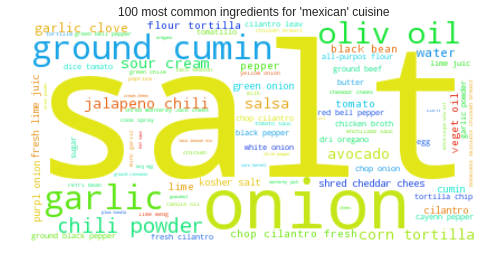

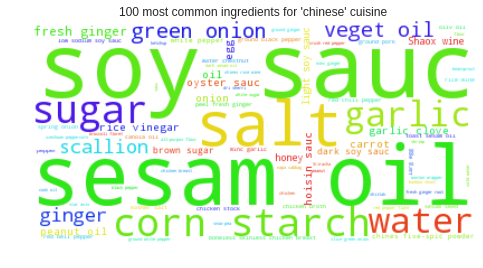

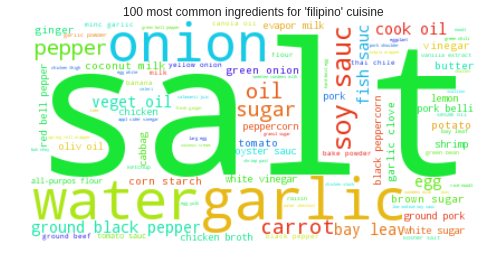

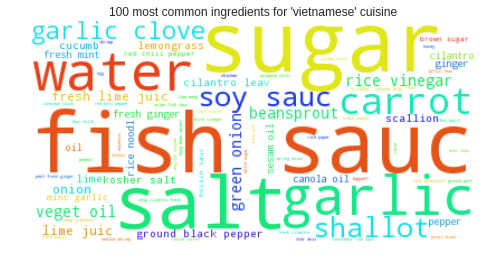

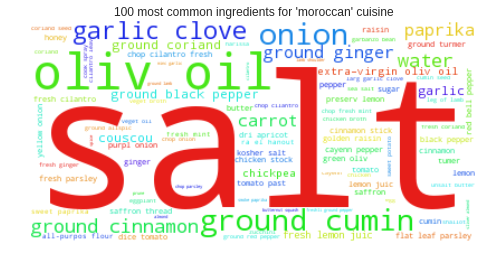

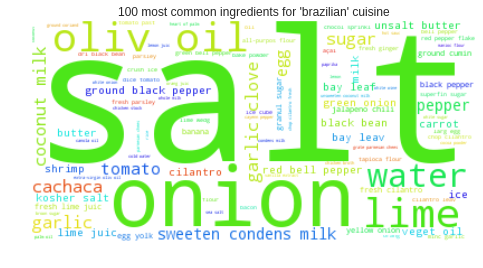

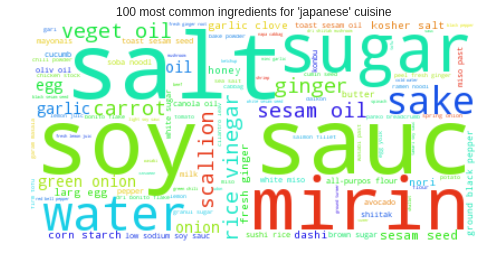

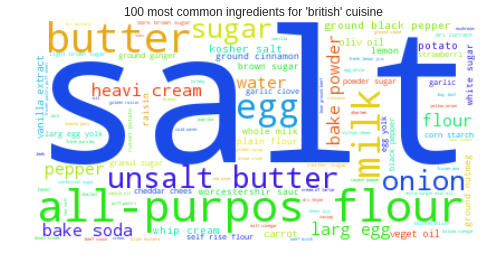

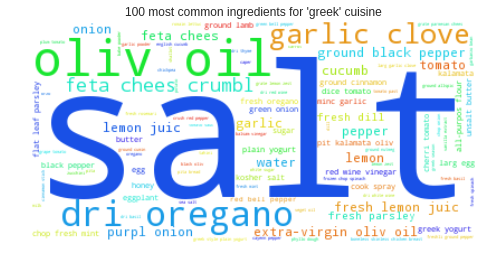

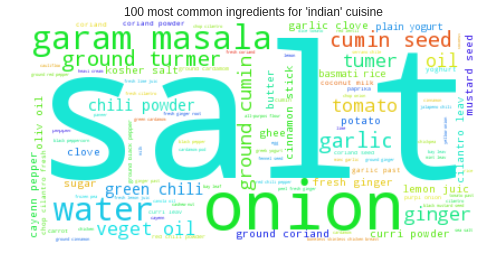

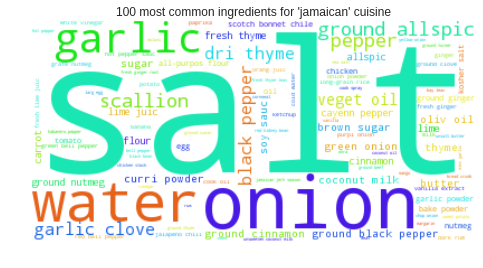

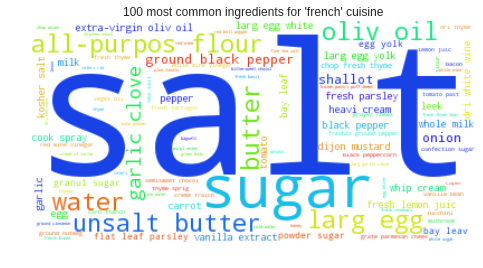

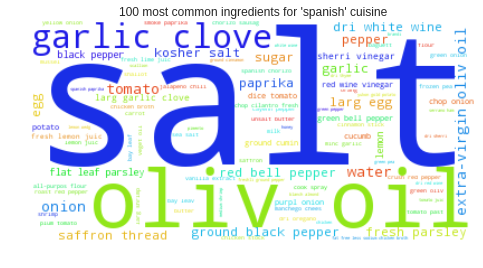

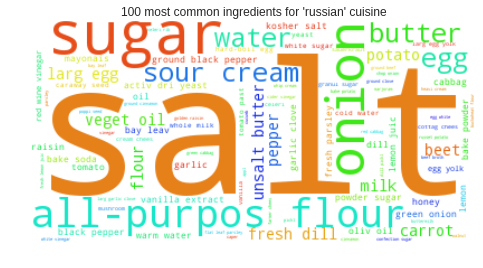

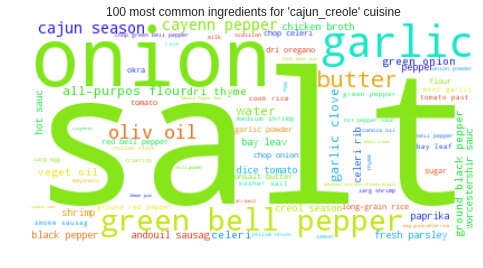

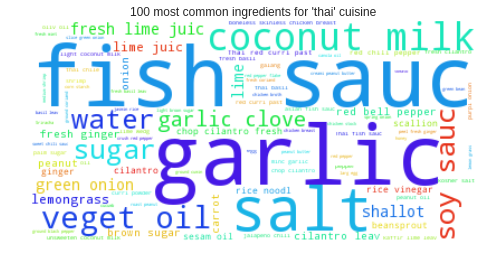

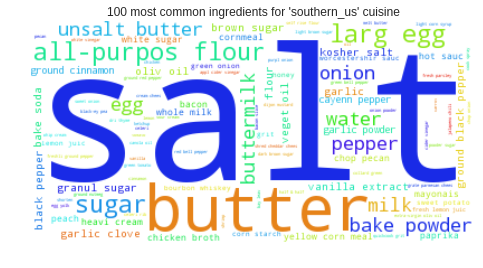

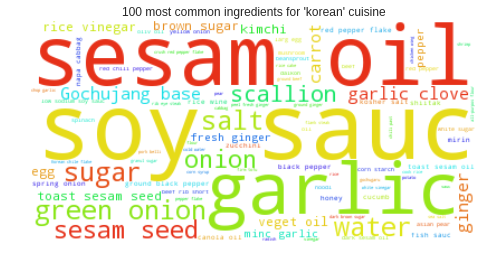

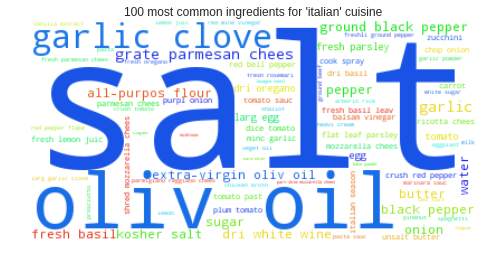

In [7]:
for key, value in cuisine_dict.iteritems():
    wc = wordcloudobj.generate_from_frequencies(value.most_common(100))
    plt.imshow(wc)
    plt.title("100 most common ingredients for '%s' cuisine" % key)
    plt.axis("off")
    plt.show()    

## Model



#### Classification Technique

NaiveBayes Classification


####  Multiclass Classification 

One vs All 


####  Clustering Technique

LDA topic modeling.  



## Model Evaluation


## Summary

